# Maana Q: Generalized Algebraic Theories (GATs)

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats.png)

## Installation

In [11]:
using Pkg
Pkg.activate(mktempdir())

Pkg.add("Catlab")
using Catlab.GAT
using Catlab.Theories
using Catlab.Present	
using Catlab.Programs	
using Catlab.WiringDiagrams
using Catlab.Graphics

Pkg.add("TikzPictures")
using TikzPictures

Pkg.add("TikzGraphs")
using TikzGraphs

Pkg.add("LightGraphs")
using LightGraphs

Pkg.add("Convex") 
import Convex

Pkg.add("SCS")
import SCS


 Activating new environment at `/var/folders/sg/1_7xybtx76j654qjl99l92ph0000gq/T/jl_1biJOT/Project.toml`
   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
Updating `/private/var/folders/sg/1_7xybtx76j654qjl99l92ph0000gq/T/jl_1biJOT/Project.toml`
  [134e5e36] + Catlab v0.9.1
Updating `/private/var/folders/sg/1_7xybtx76j654qjl99l92ph0000gq/T/jl_1biJOT/Manifest.toml`
  [79e6a3ab] + Adapt v2.3.0
  [ec485272] + ArnoldiMethod v0.0.4
  [56f22d72] + Artifacts v1.3.0
  [15f4f7f2] + AutoHashEquals v0.2.0
  [a603d957] + CanonicalTraits v0.2.3
  [134e5e36] + Catlab v0.9.1
  [944b1d66] + CodecZlib v0.7.0
  [3da002f7] + ColorTypes v0.10.9
  [5ae59095] + Colors v0.12.4
  [34da2185] + Compat v3.20.0
  [a81c6b42] + Compose v0.9.1
  [a8cc5b0e] + Crayons v4.0.4
  [9a962f9c] + DataAPI v1.3.0
  [864edb3b] + DataStructures v0.18.7
  [e2d170a0] + DataValueInterfaces v1.0.0
  [53c48c17] + Fixed

## Applied Category Theory using GATs

### Two views on category theory and software [^Patterson1]

1. Designing with categories: CT informing the design, architecture, and implementation of computer programs, in any domain.

**Slogan**: *Design patterns, but better*

2. Computing on categories: data structures and algorithms for computing with objects and morphisms in categories.

**Slogan**: *Computer algebra of categories* or *computational category theory*

**These are orthogonal [and can be layered].**

!!! tip
	This notebook is about how to use Q for computational category theory (mostly).

[^Patterson1]: [Evan Patterson: Realizing Applied Category Theory in Julia](https://www.youtube.com/watch?v=7dmrDYQh4rc)

### Representing morphisms in monoidal categories

Transforming between different **computational representations** of morphisms in symmetric monoidal categories.

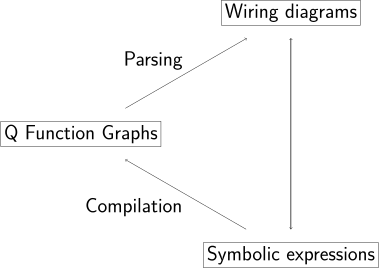

In [16]:
g = DiGraph(3)
add_edge!(g, 1, 2)
add_edge!(g, 2, 1)
add_edge!(g, 2, 3)
add_edge!(g, 3, 1)
TikzGraphs.plot(g, node_style="draw", options="scale=2, font=\\huge\\sf", TikzGraphs.Layouts.SpringElectrical(charge=25,dist=35), ["Wiring diagrams", "Symbolic expressions", "Q Function Graphs"], edge_labels=Dict((2,3)=>"Compilation", (3,1)=>"Parsing"))

In [ ]:
## Theories and Signatures

An algebraic structure consists of 3 things:

1. **Sorts**: what "sort" of things is it about
1. **Operations**: what "actions" can be taken on the sorts
1. **Equations**: what "laws" must hold for the use of the operations on the sorts

A **signature** is the pairing of sorts and operations.  A **theory** is a pairing of the signature and the equations.

This can be represented in Maana Q as:

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/theory-signature.png)

### Category Theory

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-category-theory.png)

#### Using `Catlab.jl`

In [41]:
module SandoxCat

using Catlab

@theory Category{Ob,Hom} begin

  # Opertors
  @op begin
    (→) := Hom
    (⋅) := compose
  end

  # Sorts
  Ob::TYPE
  Hom(dom::Ob,codom::Ob)::TYPE

  # Operations
  id(A::Ob)::(A → A)
  compose(f::(A → B), g::(B → C))::(A → C) ⊣ (A::Ob, B::Ob, C::Ob)

  # Equations
  ((f ⋅ g) ⋅ h == f ⋅ (g ⋅ h) ⊣ (A::Ob, B::Ob, C::Ob, D::Ob, f::(A → B), g::(B → C), h::(C → D)))
  f ⋅ id(B) == f ⊣ (A::Ob, B::Ob, f::(A → B))
  id(A) ⋅ f == f ⊣ (A::Ob, B::Ob, f::(A → B))
end

end

Main.SandoxCat

#### As Q service `yaml`

```yaml
---
service:
  id: maana-gats-category-theory
  name: Category Theory
  cloneFrom: maana-cat-ml
  kinds:
  - name: Ob
  - name: Hom
    fields:
    - name: dom
      kind: Ob
    - name: codom
      kind: Ob
  fns:
  - name: id
    fields:
    - name: A
      kind: Ob
    output:
      kind: Hom
  - name: compose
    fields:
    - name: f
      kind: Hom
    - name: g
      kind: Hom
    output:
      kind: Hom
  - name: isAssociative
    fields:
    - name: f
      kind: Hom
    - name: g
      kind: Hom
    - name: h
      kind: Hom
    output:
      kind: Boolean
  - name: isLeftUnital
    fields:
    - name: A
      kind: Ob
    - name: f
      kind: Hom
    output:
      kind: Boolean
  - name: isRightUnital
    fields:
    - name: B
      kind: Ob
    - name: f
      kind: Hom
    output:
      kind: Boolean
```

#### As Q Workspace

[maana-gats-category-theory](https://lastknowngood.knowledge.maana.io/workspace/f407eb40-3213-42fa-84e3-683fb9f40d14)

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/category-theory.png)

###### Equation: `isAssociative`

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/category-is-associative.png)

##### Equation: `isUnital`

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/category-is-unital.png)

### Monoid Theory

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-monoid-theory.png)

#### As a Catlab.jl `@theory`

In [38]:
@theory Monoid{Elem} begin

  # Operators
  @op begin
    (⊗) := mtimes
  end

  # Sorts
  Elem::TYPE

  # Operations
  munit()::Elem
  mtimes(x::Elem,y::Elem)::Elem
  
  # Equations
  (X ⊗ Y) ⊗ Z == X ⊗ (Y ⊗ Z) ⊣ (X::Elem, Y::Elem, Z::Elem)
  X ⊗ munit == X ⊣ (X::Elem)
  munit ⊗ X == X ⊣ (X::Elem)
end

Monoid

#### As Q GATs `Theory` instance (yaml)

```yaml
---
theory:
  id: maana-gats-monoid-theory
  signature:
    sorts:
    - id: maana-gats-monoid-theory/kinds/Elem
    operations:
    - id: maana-gats-monoid-theory/fns/munit
    - id: maana-gats-monoid-theory/fns/mtimes
  equations:
    - id: maana-gats-monoid-theory/fns/isAssociative
    - id: maana-gats-monoid-theory/fns/isLeftUnital
    - id: maana-gats-monoid-theory/fns/isRightUnital

```

#### As a Q `Service` (yaml)

```yaml
---
service:
  name: Monoid Theory 
  id: maana-gats-monoid-theory:
  cloneFrom: maana-cat-ml
  kinds:
  - name: Elem    
  fns:
  - name: munit
    output:
      kind: Elem
  - name: mtimes
    fields:
    - name: x
      kind: Elem
    - name: y
      kind: Elem
    output:
      kind: Elem
  - name: isAssociative
    fields:
    - name: x
      kind: Elem
    - name: y
      kind: Elem
    - name: z
      kind: Elem
    output:
      kind: Boolean
  - name: isLeftUnital
    fields:
    - name: x
      kind: Elem
    output:
      kind: Boolean
  - name: isRightUnital
    fields:
    - name: x
      kind: Elem
    output:
      kind: Boolean
```

#### As Q Workspace

[maana-gats-monoid-theory](https://lastknowngood.knowledge.maana.io/workspace/ec210150-ff86-4c0f-8213-ca47a8db34c7)

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/monoid-theory.png)

##### Equation: `isAssociative`

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/monoid-is-associative.png)

##### Equation: `isUnital`

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/monoid-is-unital.png)

## GATs Persistence

### Smart CRUD

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/theory-smart-crud.png)

### Graph*i*QL

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/algebraic-instance-graphiql.png)

### GraphQL

```graphql
mutation persist($theorys: [TheoryAsInput]) {
  persistTheorys(theorys: $theorys)
}

fragment theoryFields on Theory {
  id
  signature {
    ...signatureFields
  }
  equations {
    ...equationFields
  }
}

fragment signatureFields on Signature {
  id
  sorts {
    id
  }
  operations {
    id
  }
}

fragment equationFields on Equation {
  id
}

query get {
  allTheorys {
    ...theoryFields
  }
}
```

### JSON

```json
{"theorys":[{
    "id": "/maana-cat-monoid", 
    "signature": {
      "id": "/maana-cat-monoid", 
      "sorts": [
        {"id": "/maana-cat-monoid/kind/M"}
      ], 
      "operations": [
        {"id": "/maana-cat-monoid/fn/e"},
        {"id": "/maana-cat-monoid/fn/m"}
      ]},
    "equations": [
      {"id": "/maana-cat-monoid/fn/isAssociative"},
      {"id": "/maana-cat-monoid/fn/isUnital"},
      {"id": "/maana-cat-monoid/fn/isEqual"}
    ]
},{
    "id": "/maana-cat-category", 
    "signature": {
      "id": "/maana-cat-category", 
      "sorts": [
        {"id": "/maana-cat-category/kind/Ob"},
        {"id": "/maana-cat-category/kind/Hom"}
      ], 
      "operations": [
        {"id": "/maana-cat-category/fn/id"},
        {"id": "/maana-cat-category/fn/compose"},
        {"id": "/maana-cat-category/fn/apply"}
      ]},
    "equations": [
      {"id": "/maana-cat-category/fn/isAssociative"},
      {"id": "/maana-cat-category/fn/isUnital"},
      {"id": "/maana-cat-category/fn/isEqual"}
    ]
}]}
```

### Theory DataView

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/theory-dataview.png)

### Signature DataView

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/signature-dataview.png)

### Equation DataView

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/equation-dataview.png)

### Sort DataView

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/sort-dataview.png)

### Operation DataView

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/operation-dataview.png)

## Signatures Define Instances

To operate within a theory means to construct (or generate) *instances*.  These theories provide *stub* functions that you must implement in a context-appropriate way.  These stub functions are provided as **workspace templates** that you *clone* to then provide your logic.

### Matrix Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-matrix-category.png)

Instance of `Category` with *(element type, dimension)* pairs as objects and *matrices* as morphisms.

#### As Catlab.jl `@instance`

In [48]:
using LinearAlgebra: I

struct MatrixDom
  eltype::Type
  dim::Int
end

@instance Category{MatrixDom, Matrix} begin
  dom(M::Matrix) = MatrixDom(eltype(M), size(M,1))
  codom(M::Matrix) = MatrixDoma(eltype(M), size(M,2))

  id(m::MatrixDom) = Matrix{m.eltype}(I, m.dim, m.dim)
  compose(M::Matrix, N::Matrix) = M*N
end

#### As GATs `Instance` instance `yaml`

```yaml
---
instance:
  id: maana-gats-matrix-category
  theory: maana-gats-category-theory
```

#### As a Q `Service` (yaml)

```yaml
---
service:
  id: maana-gats-matrix-category
  name: Matrix Category
  cloneFrom: maana-gats-category-theory
  kinds:
  - name: Elem
  fns:
  - name: munit
    output:
      kind: Elem
  - name: mtimes
    fields:
    - name: x
      kind: Elem
    - name: y
      kind: Elem
    output:
      kind: Elem
  - name: isAssociative
    fields:
    - name: x
      kind: Elem
    - name: y
      kind: Elem
    - name: z
      kind: Elem
    output:
      kind: Boolean
  - name: isLeftUnital
    fields:
    - name: x
      kind: Elem
    output:
      kind: Boolean
  - name: isRightUnital
    fields:
    - name: x
      kind: Elem
    output:
      kind: Boolean
```

#### As Q Workspace

[maana-gats-matrix-category](https://lastknowngood.knowledge.maana.io/workspace/0e215223-1786-4574-80f1-4f64ad313430)

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/matrix-category.png)

##### Smart CRUD

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/matrix-category-smart-crud.png)

#### Example Use

In [34]:
M = [0 1;-1 0]

2×2 Array{Int64,2}:
  0  1
 -1  0

In [35]:
compose(M,M)

2×2 Array{Int64,2}:
 -1   0
  0  -1

In [36]:
id(dom(M))

2×2 Array{Int64,2}:
 1  0
 0  1

In [48]:
size(M,2)

2

## Extending Theories

### Monoidal Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-monoidal-category.png)


#### Using `Catlab.jl`

In [44]:
@theory MonoidalCategory{Ob,Hom} <: Category{Ob,Hom} begin
  otimes(A::Ob, B::Ob)::Ob
  otimes(f::(A → B), g::(C → D))::((A ⊗ C) → (B ⊗ D)) ⊣
    (A::Ob, B::Ob, C::Ob, D::Ob)
  @op (⊗) := otimes
  munit()::Ob

  # Monoid axioms.
  (A ⊗ B) ⊗ C == A ⊗ (B ⊗ C) ⊣ (A::Ob, B::Ob, C::Ob)
  A ⊗ munit() == A ⊣ (A::Ob)
  munit() ⊗ A == A ⊣ (A::Ob)
  (f ⊗ g) ⊗ h == f ⊗ (g ⊗ h) ⊣ (A::Ob, B::Ob, C::Ob, X::Ob, Y::Ob, Z::Ob,
                                f::(A → X), g::(B → Y), h::(C → Z))

  # Functorality axioms.
  ((f ⊗ g) ⋅ (h ⊗ k) == (f ⋅ h) ⊗ (g ⋅ k)
    ⊣ (A::Ob, B::Ob, C::Ob, X::Ob, Y::Ob, Z::Ob,
       f::(A → B), h::(B → C), g::(X → Y), k::(Y → Z)))
  id(A ⊗ B) == id(A) ⊗ id(B) ⊣ (A::Ob, B::Ob)
end

MonoidalCategory

#### As Q `yaml`

```yaml
---
service:
  maana-gats-monoidal-category:
    cloneFrom: maana-gats-category-theory
    fns:
    - name: otimesOb
      fields:
      - name: A
        kind: Ob
      - name: B
        kind: Ob
      output:
        kind: Ob
    - name: otimesHom
      fields:
      - name: f
        kind: Hom
      - name: g
        kind: Hom
      output:
        kind: Hom
    - name: munit
      output:
        kind: Ob
    - name: isCompositionFunctorial
      fields:
      - name: f
        kind: Hom
      - name: g
        kind: Hom
      - name: h
        kind: Hom
      - name: k
        kind: Hom
      output:
        kind: Boolean
    - name: isIdFunctorial
      fields:
      - name: A
        kind: Ob
      - name: B
        kind: Ob
      output:
        kind: Boolean
```

#### As Q Workspace

[maana-gats-monoidal-category](https://lastknowngood.knowledge.maana.io/workspace/2cc26a46-c27b-42a4-b287-f9ae7f084f98)

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/monoidal-category-kg.png)

### Symmetric Monoidal Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-symmetric-monoidal-category.png)


#### Using `Catlab.jl`

In [55]:
module SandboxSMC

using Catlab.GAT
import Catlab.Theories.MonoidalCategory

@theory SymmetricMonoidalCategory{Ob,Hom} <: MonoidalCategory{Ob,Hom} begin
  braid(A::Ob, B::Ob)::((A ⊗ B) → (B ⊗ A))
  @op (σ) := braid

  # Involutivity axiom.
  σ(A,B) ⋅ σ(B,A) == id(A ⊗ B) ⊣ (A::Ob, B::Ob)

  # Coherence axioms.
  σ(A,B⊗C) == (σ(A,B) ⊗ id(C)) ⋅ (id(B) ⊗ σ(A,C)) ⊣ (A::Ob, B::Ob, C::Ob)
  σ(A⊗B,C) == (id(A) ⊗ σ(B,C)) ⋅ (σ(A,C) ⊗ id(B)) ⊣ (A::Ob, B::Ob, C::Ob)

  # Naturality axiom.
  (f ⊗ g) ⋅ σ(B,D) == σ(A,C) ⋅ (g ⊗ f) ⊣ (A::Ob, B::Ob, C::Ob, D::Ob,
                                          f::(A → B), g::(C → D))
end

end

Main.SandboxSMC

#### As Q `yaml`

```yaml
---
service:
  id: maana-gats-symmetric-monoidal-category:
  cloneFrom: maana-gats-monoidal-category
  fns:
  - name: braid
    fields:
    - name: A
      kind: Ob
    - name: B
      kind: Ob
    output:
      kind: Hom
  - name: isInvolutive
    fields:
    - name: A
      kind: Ob
    - name: B
      kind: Ob
    - name: C
      kind: Ob
    output:
      kind: Boolean
  - name: isLeftCoherent
    fields:
    - name: A
      kind: Ob
    - name: B
      kind: Ob
    - name: C
      kind: Ob
    output:
      kind: Boolean
  - name: isRightCoherent
    fields:
    - name: A
      kind: Ob
    - name: B
      kind: Ob
    - name: C
      kind: Ob
    output:
      kind: Boolean
  - name: isNatural
    fields:
    - name: A
      kind: Ob
    - name: B
      kind: Ob
    - name: C
      kind: Ob
    - name: D
      kind: Ob
    - name: f
      kind: Hom
    - name: g
      kind: Hom
    output:
      kind: Boolean
```

#### As Q Workspace

[maana-gats-monoidal-category](https://lastknowngood.knowledge.maana.io/workspace/f5cd68d5-cfbf-4e0c-af20-d3c745b077bf)

![](https://github.com/maana-io/cat-ml/raw/master/images/maana-q-gats/symmetric-monoidal-category-kg.png)

In [ ]:
### Monoidal Category with Diagonals

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-monoidal-category-with-diagonals.png)


#### Using `Catlab.jl`

In [54]:
# Cartesian category
####################

""" Theory of *monoidal categories with diagonals*
A monoidal category with diagonals is a symmetric monoidal category equipped
with coherent operations of copying and deleting, also known as a supply of
commutative comonoids. Unlike in a cartesian category, the naturality axioms
need not be satisfied.
References:
- Fong & Spivak, 2019, "Supplying bells and whistles in symmetric monoidal
  categories" ([arxiv:1908.02633](https://arxiv.org/abs/1908.02633))
- Selinger, 2010, "A survey of graphical languages for monoidal categories",
  Section 6.6: "Cartesian center"
- Selinger, 1999, "Categorical structure of asynchrony"
"""
@theory MonoidalCategoryWithDiagonals{Ob,Hom} <: SymmetricMonoidalCategory{Ob,Hom} begin
  mcopy(A::Ob)::(A → (A ⊗ A))
  @op (Δ) := mcopy
  delete(A::Ob)::(A → munit())
  @op (◊) := delete

  # Commutative comonoid axioms.
  Δ(A) ⋅ (Δ(A) ⊗ id(A)) == Δ(A) ⋅ (id(A) ⊗ Δ(A)) ⊣ (A::Ob)
  Δ(A) ⋅ (◊(A) ⊗ id(A)) == id(A) ⊣ (A::Ob)
  Δ(A) ⋅ (id(A) ⊗ ◊(A)) == id(A) ⊣ (A::Ob)
  Δ(A) ⋅ σ(A,A) == Δ(A) ⊣ (A::Ob)

  # Coherence axioms.
  Δ(A⊗B) == (Δ(A) ⊗ Δ(B)) ⋅ (id(A) ⊗ σ(A,B) ⊗ id(B)) ⊣ (A::Ob, B::Ob)
  ◊(A⊗B) == ◊(A) ⊗ ◊(B) ⊣ (A::Ob, B::Ob)
  Δ(munit()) == id(munit())
  ◊(munit()) == id(munit())
end

LoadError: cannot assign a value to variable Theories.MonoidalCategoryWithDiagonals from module Main

In [ ]:
### Cartesian Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-cartesian-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
""" Theory of *cartesian (monoidal) categories*
For the traditional axiomatization of products, see
[`CategoryWithProducts`](@ref).
"""
@theory CartesianCategory{Ob,Hom} <: MonoidalCategoryWithDiagonals{Ob,Hom} begin
  pair(f::(A → B), g::(A → C))::(A → (B ⊗ C)) ⊣ (A::Ob, B::Ob, C::Ob)
  proj1(A::Ob, B::Ob)::((A ⊗ B) → A)
  proj2(A::Ob, B::Ob)::((A ⊗ B) → B)

  # Definitions of pairing and projections.
  pair(f,g) == Δ(C)⋅(f⊗g) ⊣ (A::Ob, B::Ob, C::Ob, f::(C → A), g::(C → B))
  proj1(A,B) == id(A)⊗◊(B) ⊣ (A::Ob, B::Ob)
  proj2(A,B) == ◊(A)⊗id(B) ⊣ (A::Ob, B::Ob)
  
  # Naturality axioms.
  f⋅Δ(B) == Δ(A)⋅(f⊗f) ⊣ (A::Ob, B::Ob, f::(A → B))
  f⋅◊(B) == ◊(A) ⊣ (A::Ob, B::Ob, f::(A → B))
end

In [ ]:
### Monoidal Category with Bidiagonals

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-monoidal-category-with-bidiagonals.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Biproduct category
####################

""" Theory of *monoidal categories with bidiagonals*
The terminology is nonstandard (is there any standard terminology?) but is
supposed to mean a monoidal category with coherent diagonals and codiagonals.
Unlike in a biproduct category, the naturality axioms need not be satisfied.
"""
@signature MonoidalCategoryWithBidiagonals{Ob,Hom} <:
    MonoidalCategoryWithDiagonals{Ob,Hom} begin
  mmerge(A::Ob)::((A ⊗ A) → A)
  @op (∇) := mmerge
  create(A::Ob)::(munit() → A)
  @op (□) := create
end


In [ ]:
### Biproduct Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-biproduct-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
""" Theory of *biproduct categories*
Mathematically the same as [`SemiadditiveCategory`](@ref) but written
multiplicatively, instead of additively.
"""
@theory BiproductCategory{Ob,Hom} <: MonoidalCategoryWithBidiagonals{Ob,Hom} begin
  pair(f::(A → B), g::(A → C))::(A → (B ⊗ C)) ⊣ (A::Ob, B::Ob, C::Ob)
  copair(f::(A → C), g::(B → C))::((A ⊗ B) → C) ⊣ (A::Ob, B::Ob, C::Ob)
  proj1(A::Ob, B::Ob)::((A ⊗ B) → A)
  proj2(A::Ob, B::Ob)::((A ⊗ B) → B)
  coproj1(A::Ob, B::Ob)::(A → (A ⊗ B))
  coproj2(A::Ob, B::Ob)::(B → (A ⊗ B))
  
  # Naturality axioms.
  f⋅Δ(B) == Δ(A)⋅(f⊗f) ⊣ (A::Ob, B::Ob, f::(A → B))
  f⋅◊(B) == ◊(A) ⊣ (A::Ob, B::Ob, f::(A → B))
  ∇(A)⋅f == (f⊗f)⋅∇(B) ⊣ (A::Ob, B::Ob, f::(A → B))
  □(A)⋅f == □(B) ⊣ (A::Ob, B::Ob, f::(A → B))
  
  # Bimonoid axioms. (These follow from naturality + coherence axioms.)
  ∇(A)⋅Δ(A) == (Δ(A)⊗Δ(A)) ⋅ (id(A)⊗σ(A,A)⊗id(A)) ⋅ (∇(A)⊗∇(A)) ⊣ (A::Ob)
  ∇(A)⋅◊(A) == ◊(A) ⊗ ◊(A) ⊣ (A::Ob)
  □(A)⋅Δ(A) == □(A) ⊗ □(A) ⊣ (A::Ob)
  □(A)⋅◊(A) == id(munit()) ⊣ (A::Ob)
end

In [ ]:
### Closed Monoidal Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-closed-monoidal-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Closed monoidal category
##########################

""" Theory of (symmetric) *closed monoidal categories*
"""
@signature ClosedMonoidalCategory{Ob,Hom} <: SymmetricMonoidalCategory{Ob,Hom} begin
  # Internal hom of A and B, an object representing Hom(A,B)
  hom(A::Ob, B::Ob)::Ob

  # Evaluation map
  ev(A::Ob, B::Ob)::((hom(A,B) ⊗ A) → B)

  # Currying (aka, lambda abstraction)
  curry(A::Ob, B::Ob, f::((A ⊗ B) → C))::(A → hom(B,C)) ⊣ (C::Ob)
end

In [ ]:
### Cartesian Closed Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-cartesian-closed-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Cartesian closed category
###########################

""" Theory of *cartesian closed categories*, aka CCCs
A CCC is a cartesian category with internal homs (aka, exponential objects).
FIXME: This theory should also extend `ClosedMonoidalCategory`, but multiple
inheritance is not yet supported.
"""
@signature CartesianClosedCategory{Ob,Hom} <: CartesianCategory{Ob,Hom} begin
  hom(A::Ob, B::Ob)::Ob
  ev(A::Ob, B::Ob)::((hom(A,B) ⊗ A) → B)
  curry(A::Ob, B::Ob, f::((A ⊗ B) → C))::(A → hom(B,C)) ⊣ (C::Ob)
end

In [ ]:
### Compact Closed Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-compact-closed-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Compact closed category
#########################

""" Theory of *compact closed categories*
"""
@theory CompactClosedCategory{Ob,Hom} <: ClosedMonoidalCategory{Ob,Hom} begin
  # Dual A^* of object A
  dual(A::Ob)::Ob

  # Unit of duality, aka the coevaluation map
  dunit(A::Ob)::(munit() → (dual(A) ⊗ A))

  # Counit of duality, aka the evaluation map
  dcounit(A::Ob)::((A ⊗ dual(A)) → munit())

  # Adjoint mate of morphism f.
  mate(f::(A → B))::(dual(B) → dual(A)) ⊣ (A::Ob, B::Ob)
  
  # Axioms for closed monoidal structure.
  hom(A, B) == B ⊗ dual(A) ⊣ (A::Ob, B::Ob)
  ev(A, B) == id(B) ⊗ (σ(dual(A), A) ⋅ dcounit(A)) ⊣ (A::Ob, B::Ob)
  (curry(A, B, f) == (id(A) ⊗ (dunit(B) ⋅ σ(dual(B), B))) ⋅ (f ⊗ id(dual(B)))
   ⊣ (A::Ob, B::Ob, C::Ob, f::((A ⊗ B) → C)))
end

In [ ]:
### Dagger Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-dagger-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Dagger category
#################

""" Theory of *dagger categories*
"""
@signature DaggerCategory{Ob,Hom} <: Category{Ob,Hom} begin
  dagger(f::(A → B))::(B → A) ⊣ (A::Ob, B::Ob)
end


In [ ]:
### Dagger Symmetric Monoidal Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-dagger-symmetric-monoidal-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
"" Theory of *dagger symmetric monoidal categories*
Also known as a [symmetric monoidal dagger
category](https://ncatlab.org/nlab/show/symmetric+monoidal+dagger-category).
FIXME: This theory should also extend `DaggerCategory`, but multiple inheritance
is not yet supported.
"""
@signature DaggerSymmetricMonoidalCategory{Ob,Hom} <: SymmetricMonoidalCategory{Ob,Hom} begin
  dagger(f::(A → B))::(B → A) ⊣ (A::Ob, B::Ob)
end


In [ ]:
### Dagger Compact Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-dagger-compact-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
""" Theory of *dagger compact categories*
In a dagger compact category, there are two kinds of adjoints of a morphism
`f::Hom(A,B)`, the adjoint mate `mate(f)::Hom(dual(B),dual(A))` and the dagger
adjoint `dagger(f)::Hom(B,A)`. In the category of Hilbert spaces, these are
respectively the Banach space adjoint and the Hilbert space adjoint (Reed-Simon,
Vol I, Sec VI.2). In Julia, they would correspond to `transpose` and `adjoint`
in the official `LinearAlegbra` module. For the general relationship between
mates and daggers, see Selinger's survey of graphical languages for monoidal
categories.
FIXME: This theory should also extend `DaggerCategory`, but multiple inheritance
is not yet supported.
"""
@signature DaggerCompactCategory{Ob,Hom} <: CompactClosedCategory{Ob,Hom} begin
  dagger(f::(A → B))::(B → A) ⊣ (A::Ob, B::Ob)
end

In [ ]:
### Traced Monoidal Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-traced-monoidal-category.png)

In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Traced monoidal category
##########################

""" Theory of *traced monoidal categories*
"""
@signature TracedMonoidalCategory{Ob,Hom} <: SymmetricMonoidalCategory{Ob,Hom} begin
  trace(X::Ob, A::Ob, B::Ob, f::((X ⊗ A) → (X ⊗ B)))::(A → B)
end


In [ ]:
### Hypergraph Category

![](https://github.com/maana-io/cat-ml/raw/master/thumbnails/maana-gats-hypergraph-category.png)


In [ ]:
#### Using `Catlab.jl`

In [ ]:
# Hypergraph category
#####################

""" Theory of *hypergraph categories*
Hypergraph categories are also known as "well-supported compact closed
categories" and "spidered/dungeon categories", among other things.
FIXME: Should also inherit `ClosedMonoidalCategory` and `DaggerCategory`, but
multiple inheritance is not yet supported.
"""
@theory HypergraphCategory{Ob,Hom} <: MonoidalCategoryWithBidiagonals{Ob,Hom} begin
  # Self-dual compact closed category.
  dunit(A::Ob)::(munit() → (A ⊗ A))
  dcounit(A::Ob)::((A ⊗ A) → munit())
  dagger(f::(A → B))::(B → A) ⊣ (A::Ob, B::Ob)

  dunit(A) == create(A) ⋅ mcopy(A) ⊣ (A::Ob)
  dcounit(A) == mmerge(A) ⋅ delete(A) ⊣ (A::Ob)
  (dagger(f) == (id(Y) ⊗ dunit(X)) ⋅ (id(Y) ⊗ f ⊗ id(X)) ⋅ (dcounit(Y) ⊗ id(X))
   ⊣ (A::Ob, B::Ob, f::(A → B)))
end